<a href="https://colab.research.google.com/github/YashNHanabar/FeynnLabsInternship/blob/main/EV_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
df=pd.read_csv("/content/EV_Data.csv")
df_1=df.copy()
df.head(10)


,Age,City,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
5,28,Pune,Single,Graduate,5,2.945694e+06,Maybe,SUV,Yes,Volkswagen,<15 lakhs,2,"Yes, in <10 years"
6,23,Pune,Married,Graduate,3,2.686745e+06,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
7,25,Pune,Married,Post Graduate,4,2.034627e+06,Yes,Sedan,Yes,MG,<5 lakhs,4,"Yes, in <10 years"
8,43,Noida,Single,Graduate,2,2.040275e+06,Yes,SUV,Yes,Volkswagen,<15 lakhs,2,"Yes, in <20years"
9,27,Pune,Single,Graduate,4,5.628716e+05,Yes,Sedan,Yes,Tata,<15 lakhs,4,"Yes, in <10 years"


##**Data Preprocessing**

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   1000 non-null   int64  
 1   City                                                                  1000 non-null   object 
 2   Marital Status                                                        1000 non-null   object 
 3   Education                                                             1000 non-null   object 
 4   No. of Family members                                                 1000 non-null   int64  
 5   Annual Income                                                         1000 non-null   float64
 6   Would you prefer replacing all your vehicles to Electronic vehicles?  1000 non-null   object 
 7 

From the output provided by df.info(), we can gather several important insights about the dataset:

    Column Names and Data Types:
        The dataset consists of 13 columns.
        The data types include integers (int64), floats (float64), and objects (strings).

    Non-Null Counts:
        Each column has 1000 non-null entries, indicating there are no missing values in the dataset.

    Structure of the Dataset:
        The columns include a mix of demographic information (Age, City, Marital Status, Education, No. of Family members, Annual Income), preferences and opinions on electronic vehicles (Would you prefer replacing all your vehicles to Electronic vehicles?, If Yes/Maybe what type of EV would you prefer?, Do you think Electronic Vehicles are economical?, How much money could you spend on an Electronic vehicle?, Preference for wheels in EV, Do you think Electronic vehicles will replace fuel cars in India?), and current ownership status (Which brand of vehicle do you currently own?).

### Here's a description of what each column in the dataset represents:

1. **Age**: The age of the respondent (integer).
2. **City**: The city where the respondent resides (string/object).
3. **Marital Status**: The marital status of the respondent, such as single, married, etc. (string/object).
4. **Education**: The highest level of education attained by the respondent (string/object).
5. **No. of Family members**: The number of family members in the respondent's household (integer).
6. **Annual Income**: The annual income of the respondent (float).
7. **Would you prefer replacing all your vehicles to Electronic vehicles?**: The respondent's preference for replacing all their vehicles with electronic vehicles (string/object; could be Yes, No, or Maybe).
8. **If Yes/Maybe what type of EV would you prefer?**: The type of electronic vehicle the respondent would prefer if they are open to replacing their current vehicles (string/object; applicable if the answer to the previous question is Yes or Maybe).
9. **Do you think Electronic Vehicles are economical?**: The respondent's opinion on whether electronic vehicles are economical (string/object).
10. **Which brand of vehicle do you currently own?**: The brand of the vehicle currently owned by the respondent (string/object).
11. **How much money could you spend on an Electronic vehicle?**: The amount of money the respondent is willing to spend on an electronic vehicle (string/object; likely represents a range or specific amount).
12. **Preference for wheels in EV**: The respondent's preference for the number of wheels in an electronic vehicle (integer).
13. **Do you think Electronic vehicles will replace fuel cars in India?**: The respondent's opinion on whether electronic vehicles will eventually replace fuel cars in India (string/object).


In [169]:
# Get the unique ages
unique_ages = df['Age'].unique()

# Sort the unique ages
sorted_ages = sorted(unique_ages)

# Display the sorted ages
print(sorted_ages)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 82, 86, 96, 118]


The sorted list of unique ages in your dataset provides several insights:

    Age Range:
        The ages range from 15 to 118 years, indicating that the dataset covers a wide spectrum of age groups, from teenagers to very elderly individuals.

    Age Distribution:
        The presence of ages in sequential order (from 15 to 70) suggests a continuous representation of these age groups in the dataset.
        There are significant gaps after 70, with ages 82, 86, 96, and 118, indicating fewer individuals in these older age brackets.

    Target Audience:
        The dataset includes data from both young and older individuals, which can provide diverse perspectives and preferences, especially important in studies related to consumer behavior, health, or technology adoption.

    Data Coverage:
        The broad age coverage suggests that the data can be used to analyze trends and preferences across different life stages, from youth to senior citizens.

In [170]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur ', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani ', 'Nellore ', 'Pune ', 'Haldwani',
       'Banglore ', 'Faridabad ', 'Nagpur', 'Chandrapur ', 'Chennai',
       'Gurugram ', 'Nashik', 'Bengaluru', 'Mumbai ', 'Hakdwani',
       'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal', 'Rewari', 'New Delhi',
       'Serampore', 'Jhansi', 'New Delhi ', 'Jalandhar', 'Delhi ',
       'nashik'], dtype=object)

In [171]:
# Define a dictionary for replacing similar city names with a standardized name
city_replacements = {
    'Pune ': 'Pune',
    'pune': 'Pune',
    'pUNE': 'Pune',
    'solapur': 'Solapur',
    'Haldwani ': 'Haldwani',
    'Banglore ': 'Bangalore',
    'Faridabad ': 'Faridabad',
    'Chandrapur ': 'Chandrapur',
    'Gurugram ': 'Gurugram',
    'Mumbai ': 'Mumbai',
    'Hakdwani': 'Haldwani',
    'New Delhi ': 'New Delhi',
    'Delhi ': 'New Delhi',
    'nashik': 'Nashik'
}

# Replace the city names in the DataFrame
df['City'] = df['City'].replace(city_replacements)

# Display the unique city names to verify the replacements
print(df['City'].unique())

['Nabha' 'Pune' 'Kashipur ' 'Satara' 'Noida' 'Delhi' 'Mumbai' 'Solapur'
 'Haldwani' 'Nellore ' 'Bangalore' 'Faridabad' 'Nagpur' 'Chandrapur'
 'Chennai' 'Gurugram' 'Nashik' 'Bengaluru' 'Patiyala' 'Ahmedabad' 'Karnal'
 'Rewari' 'New Delhi' 'Serampore' 'Jhansi' 'Jalandhar']


In [172]:
df['Education'].unique()

array(['Graduate', 'Post Graduate'], dtype=object)

In [173]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7])

In [174]:
# sorted(df['Annual Income'].unique())

There seems to be entries with negative income. might be inconsistencies. We will remove those records

In [175]:
# Filter out rows with negative annual income
df = df[df['Annual Income'] >= 0]

In [176]:
# Use describe() to generate summary statistics for 'Annual Income' column
income_stats = df['Annual Income'].describe()

# Get the minimum and maximum values
income_min = income_stats['min']
income_max = income_stats['max']

# Print the minimum and maximum values
print("Minimum Annual Income:", income_min)
print("Maximum Annual Income:", income_max)

Minimum Annual Income: 27134.78254
Maximum Annual Income: 12821282.03


In [177]:
# Define the bins and labels
bins = [0, 1000000, 2000000, 3000000, 5000000, 10000000, float('inf')]
labels = ['<1M', '1M-2M', '2M-3M', '3M-5M', '5M-10M', '>10M']

# Use cut to bin the values
df['Income Category'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)
df['Income Category'].value_counts()

Income Category
2M-3M     554
1M-2M     286
3M-5M      94
<1M        56
>10M        5
5M-10M      2
Name: count, dtype: int64

In [178]:
df.drop('Annual Income', axis=1, inplace = True)

In [179]:
df.columns

Index(['Age', 'City', 'Marital Status', 'Education', 'No. of Family members',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?',
       'Income Category'],
      dtype='object')

In [180]:
df['Would you prefer replacing all your vehicles to Electronic vehicles?'].unique()

array(['Maybe', 'Yes', 'No'], dtype=object)

In [181]:
df['If Yes/Maybe what type of  EV would you prefer?'].unique()

array(['SUV', 'Hatchback', 'Sedan', 'Liftback', 'Cabrio'], dtype=object)

In [182]:
df['Do you think Electronic Vehicles are economical?'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [183]:
df['Which brand of vehicle do you currently own?'].unique()

array(['Hyundai', 'Honda', 'KIA', 'McLaren ', 'Volkswagen', 'MG', 'Tata',
       'Nissan', 'Chevrolet ', 'Suzuki ', 'Maruti', 'Maruti ',
       'Maruti Suzuki', 'Nexa', 'Audi', 'BMW'], dtype=object)

In [184]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [185]:
# Define a dictionary to map number values to categories
income_categories = {
    '700000': '<5 lakhs',
    '1200000': '<15 lakhs',
    '1500000': '<15 lakhs',
    '2000000': '<25 lakhs'
}

# Replace number values with categories in the 'How much money could you spend on an Electronic vehicle?' column
df['How much money could you spend on an Electronic vehicle?'] = df['How much money could you spend on an Electronic vehicle?'].replace(income_categories)

# Display the unique values in the column to verify the replacements
print(df['How much money could you spend on an Electronic vehicle?'].unique())


['<5 lakhs' '<15 lakhs' '<25 lakhs' '>25 lakhs']


In [186]:
df['Preference for wheels in EV'].unique()

array([2, 4, 3])

In [187]:
df['Do you think Electronic vehicles will replace fuel cars in India?'].unique()

array(["I don't think so", 'Yes, in <20years', 'Yes, in <10 years',
       'Yes, possibly after 20 years'], dtype=object)

In [188]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}\n")


Column: Age
Unique Values: [ 30  27  32  55  26  28  23  25  43  59  21  29  56  70  50  24  61  39
  31  40  18  58  22  96  64  52  54  42  49  57  46  36  20  19  65  17
  60  44  45  47  82  33  37  48  69  67  86  62  66  34  63  41  68  16
  53  15 118  38]

Column: City
Unique Values: ['Nabha' 'Pune' 'Kashipur ' 'Satara' 'Noida' 'Delhi' 'Mumbai' 'Solapur'
 'Haldwani' 'Nellore ' 'Bangalore' 'Faridabad' 'Nagpur' 'Chandrapur'
 'Chennai' 'Gurugram' 'Nashik' 'Bengaluru' 'Patiyala' 'Ahmedabad' 'Karnal'
 'Rewari' 'New Delhi' 'Serampore' 'Jhansi' 'Jalandhar']

Column: Marital Status
Unique Values: ['Single' 'Married']

Column: Education
Unique Values: ['Graduate' 'Post Graduate']

Column: No. of Family members
Unique Values: [5 4 3 2 8 6 0 1 7]

Column: Would you prefer replacing all your vehicles to Electronic vehicles?
Unique Values: ['Maybe' 'Yes' 'No']

Column: If Yes/Maybe what type of  EV would you prefer?
Unique Values: ['SUV' 'Hatchback' 'Sedan' 'Liftback' 'Cabrio']

Column: Do 

#Data Visualizations

###Age Distribution:

    Histogram: To visualize the distribution of ages in the dataset.
    Box Plot: To identify the median, quartiles, and any outliers in the age data.

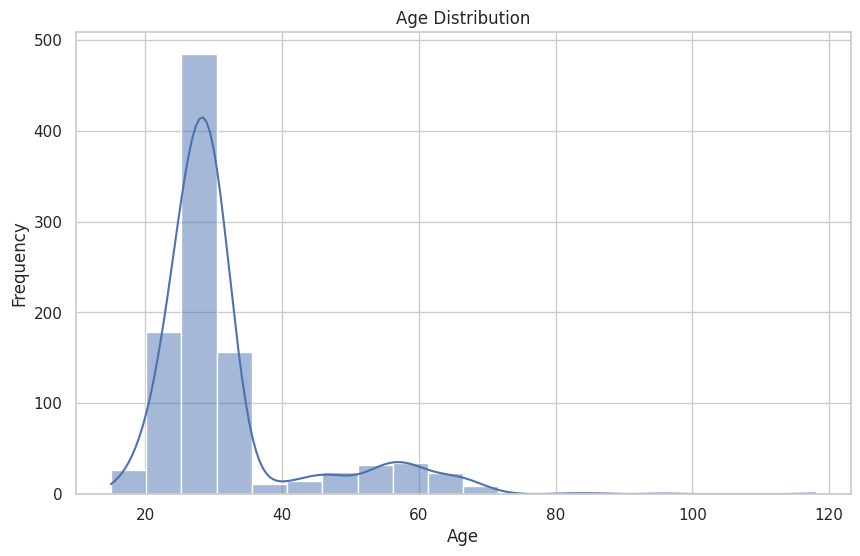

In [189]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


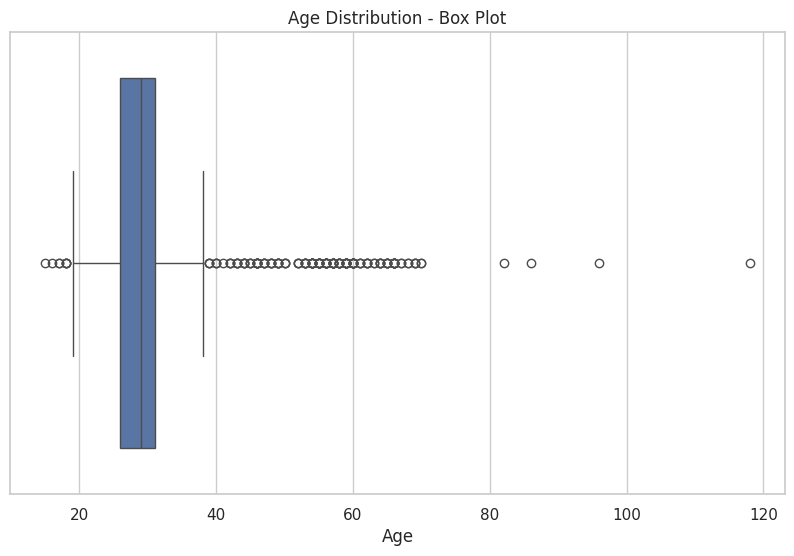

In [190]:
# Box Plot for Age Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Age Distribution - Box Plot')
plt.xlabel('Age')
plt.show()


###City Distribution:

    Bar Chart: To show the number of respondents from each city.


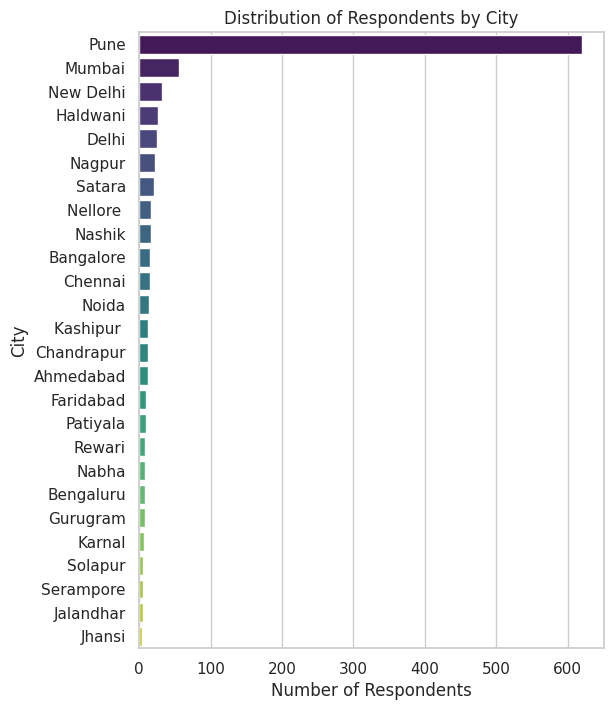

In [191]:
# Count the number of respondents from each city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Set the style of seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(6, 8))
sns.barplot(x='Count', y='City', data=city_counts, palette='viridis')
plt.title('Distribution of Respondents by City')
plt.xlabel('Number of Respondents')
plt.ylabel('City')
plt.show()

###Marital Status and Education:

    Pie Chart: For visualizing the proportions of different marital statuses and education levels among respondents.

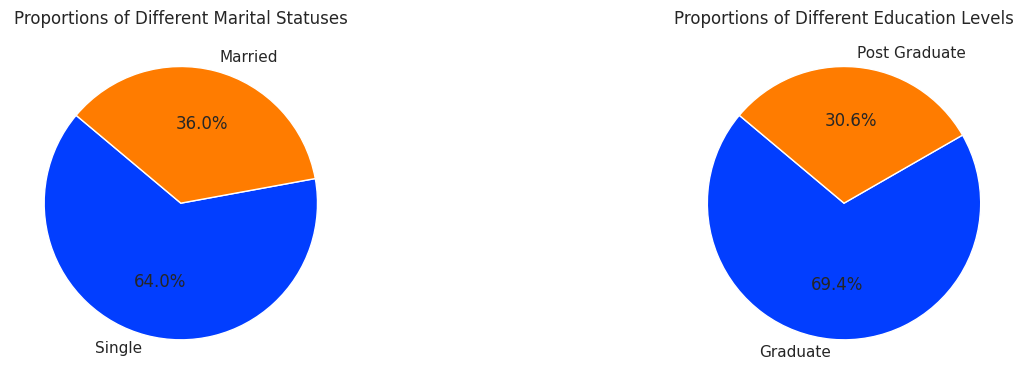

In [192]:
# Count the proportions for Marital Status
marital_status_counts = df['Marital Status'].value_counts()

# Pie Chart for Marital Status
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
colors = sns.color_palette('bright')
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportions of Different Marital Statuses')

# Count the proportions for Education
education_counts = df['Education'].value_counts()

# Pie Chart for Education
plt.subplot(1, 2, 2)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportions of Different Education Levels')

plt.tight_layout()
plt.show()

###No. of Family Members:

    Bar Chart: To show the distribution of family sizes.

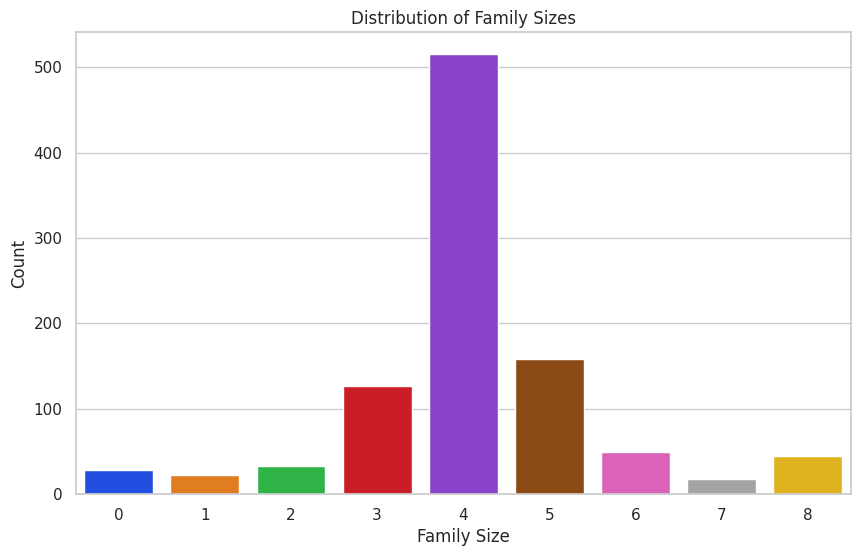

In [193]:
# Count the occurrences of each family size
family_size_counts = df['No. of Family members'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=family_size_counts.index, y=family_size_counts.values, palette='bright')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Distribution of Family Sizes')
plt.show()

###Vehicle Preference (EV) Analysis:

    Stacked Bar Chart: To compare preferences for replacing vehicles with electronic vehicles across different categories like marital status, education level, or city.
    Pie Chart: For the overall preference for replacing vehicles with electronic vehicles.


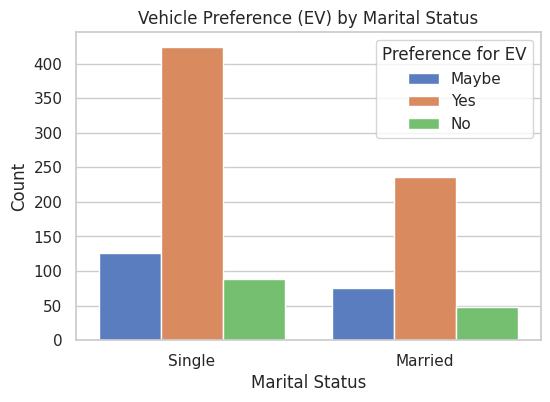

In [194]:
# Stacked Bar Chart for comparing preferences across different categories
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital Status', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='muted')
plt.title('Vehicle Preference (EV) by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Preference for EV')
plt.show()


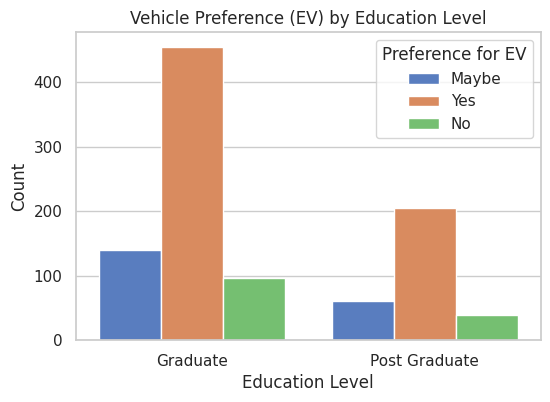

In [195]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='muted')
plt.title('Vehicle Preference (EV) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Preference for EV')
plt.show()


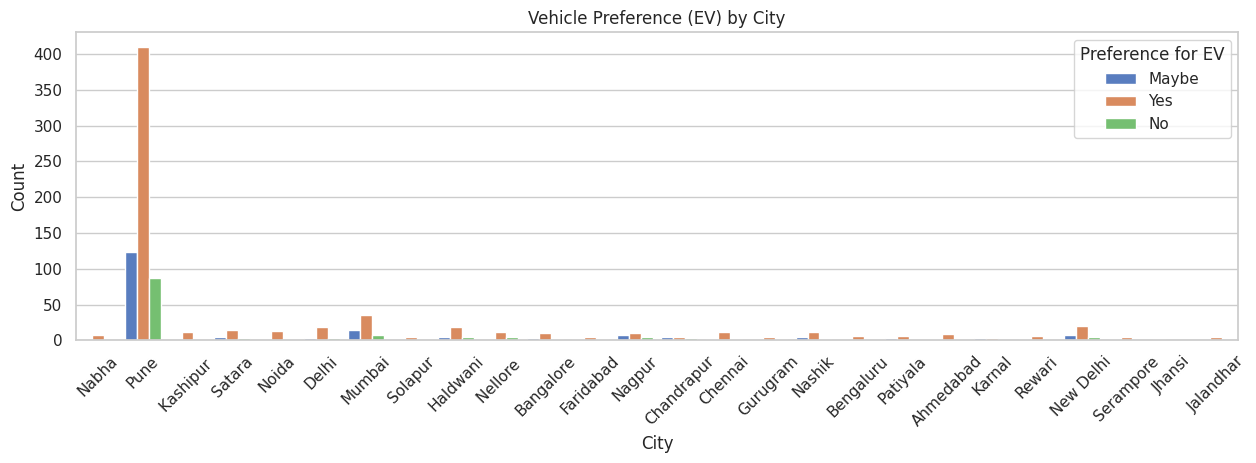

In [196]:

plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='City', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='muted')
plt.title('Vehicle Preference (EV) by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Preference for EV')
plt.xticks(rotation=45)
plt.show()


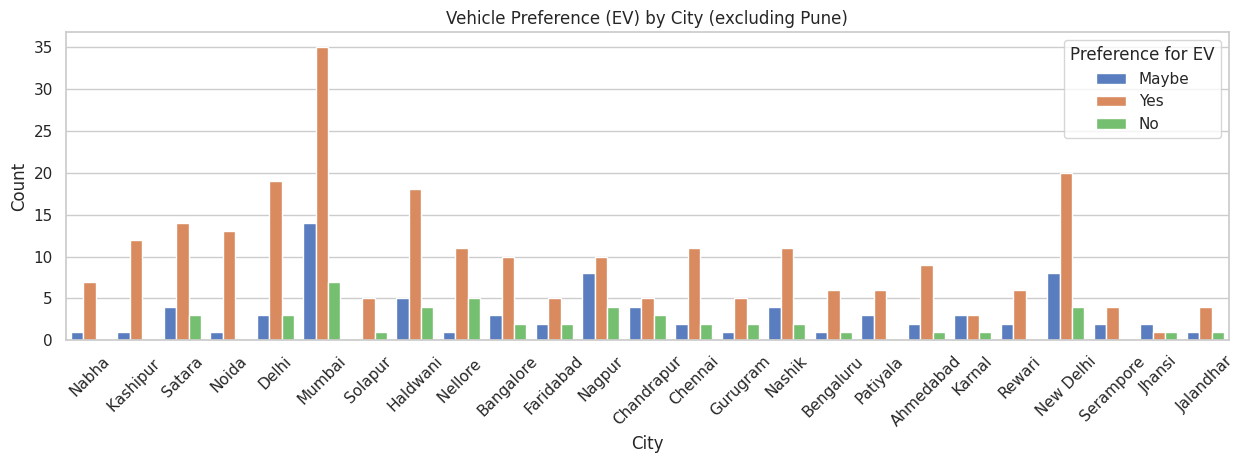

In [197]:
# Filter out rows where City is 'Pune'
df_filtered = df[df['City'] != 'Pune']

# Plot the filtered data
plt.figure(figsize=(15, 4))
sns.countplot(data=df_filtered, x='City', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='muted')
plt.title('Vehicle Preference (EV) by City (excluding Pune)')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Preference for EV')
plt.xticks(rotation=45)
plt.show()

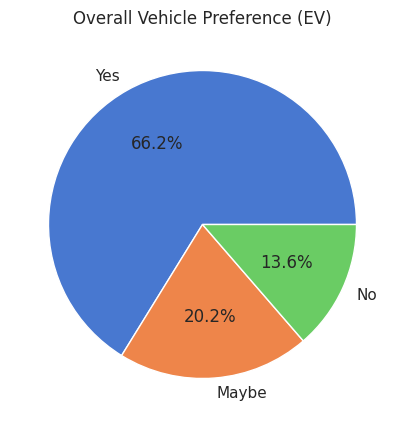

In [198]:

# Pie chart for overall preference
overall_preference = df['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(overall_preference, labels=overall_preference.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Overall Vehicle Preference (EV)')
plt.show()

###Preferred Type of EV:

    Bar Chart: To show the preference for different types of EVs among those who chose "Yes" or "Maybe" for replacing vehicles with EVs.

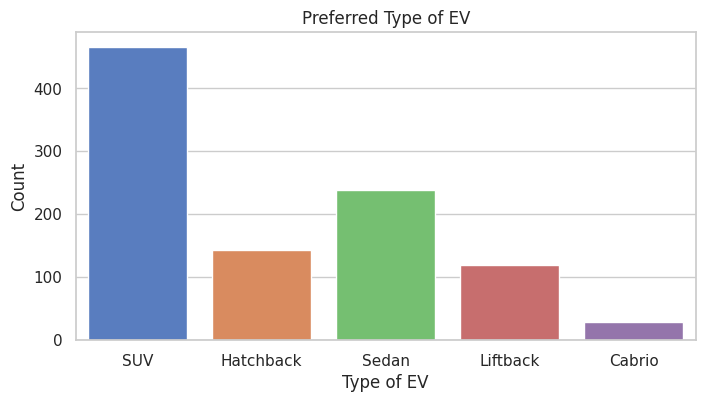

In [199]:
# Plot the data
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='If Yes/Maybe what type of  EV would you prefer?', palette='muted')
plt.title('Preferred Type of EV')
plt.xlabel('Type of EV')
plt.ylabel('Count')
plt.show()

###Perception of Economical EVs:

    Pie Chart: To show how many respondents think electronic vehicles are economical.


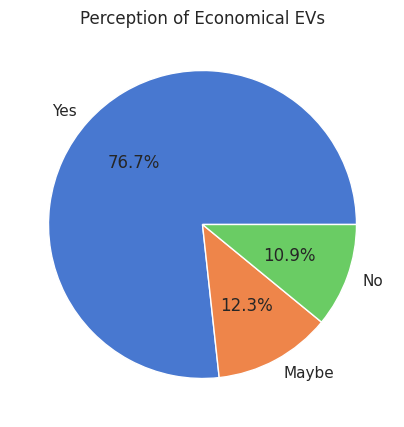

In [200]:
# Count the responses for each category
economical_counts = df['Do you think Electronic Vehicles are economical?'].value_counts()

# Plot the data
plt.figure(figsize=(5,5))
plt.pie(economical_counts, labels=economical_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Perception of Economical EVs')
plt.show()

###Current Vehicle Brands Owned:

    Bar Chart: To show the distribution of current vehicle brands owned by respondents.


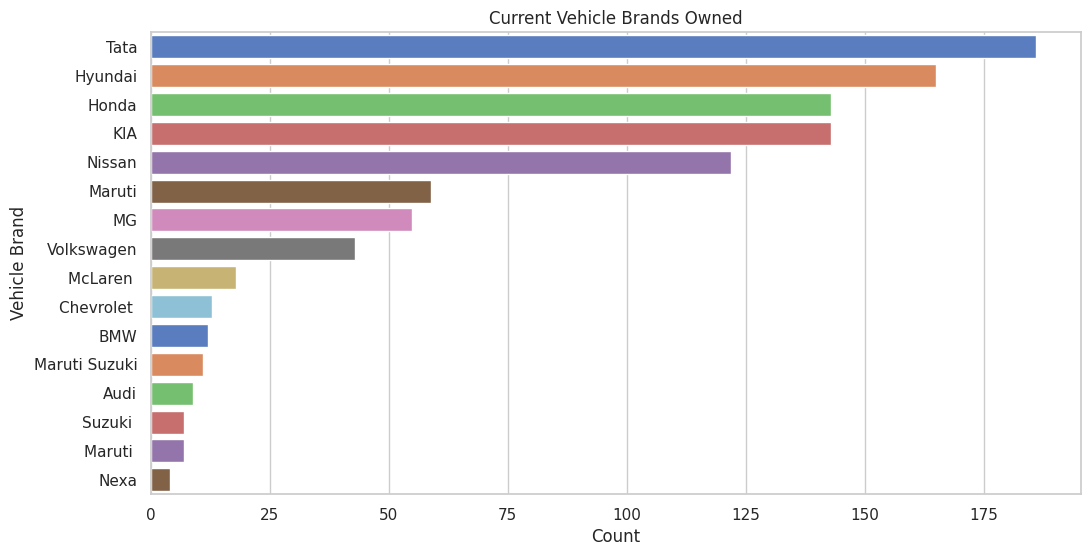

In [201]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Which brand of vehicle do you currently own?', palette='muted', order=df['Which brand of vehicle do you currently own?'].value_counts().index)
plt.title('Current Vehicle Brands Owned')
plt.xlabel('Count')
plt.ylabel('Vehicle Brand')
plt.show()

###Budget for an EV:

    Pie Chart: To show the distribution of budgets respondents are willing to spend on an electronic vehicle.


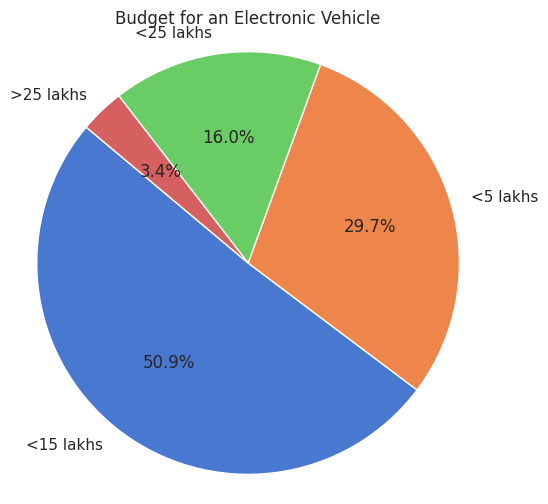

In [202]:
# Count the occurrences of each budget category
budget_counts = df['How much money could you spend on an Electronic vehicle?'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(budget_counts, labels=budget_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"), startangle=140)
plt.title('Budget for an Electronic Vehicle')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Wheels Preference in EV:

    Bar Chart: To show the distribution of preferences for the number of wheels in EVs.


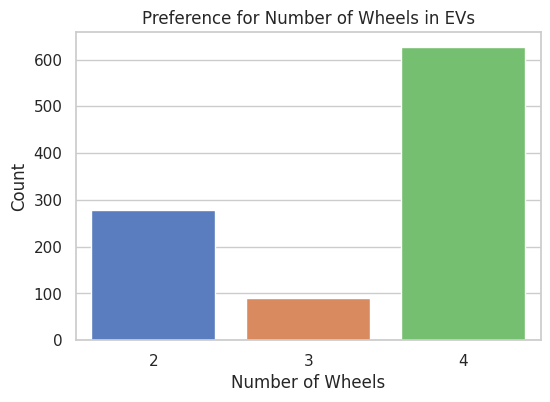

In [203]:
# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Preference for wheels in EV', palette='muted')
plt.title('Preference for Number of Wheels in EVs')
plt.xlabel('Number of Wheels')
plt.ylabel('Count')
plt.show()

###Future of EVs in India:

    Bar Chart: To show respondents' beliefs about the timeline for electronic vehicles replacing fuel cars in India.

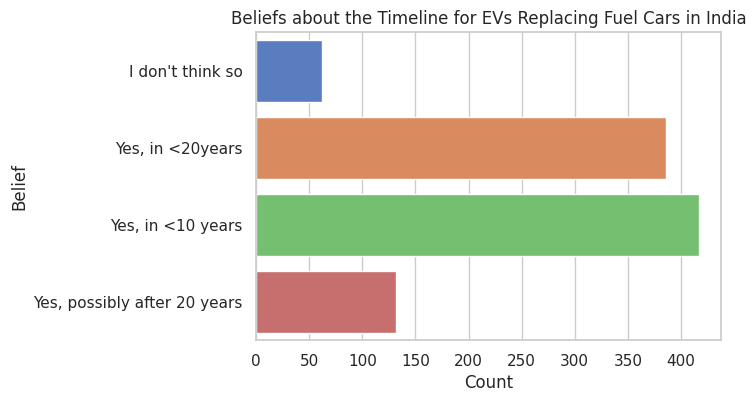

In [204]:

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='Do you think Electronic vehicles will replace fuel cars in India?', palette='muted')
plt.title('Beliefs about the Timeline for EVs Replacing Fuel Cars in India')
plt.xlabel('Count')
plt.ylabel('Belief')
plt.show()

###Income Category Analysis:

    Bar Chart: To show the distribution of respondents across different income categories.
    Box Plot: To compare income categories with other variables like age or education.

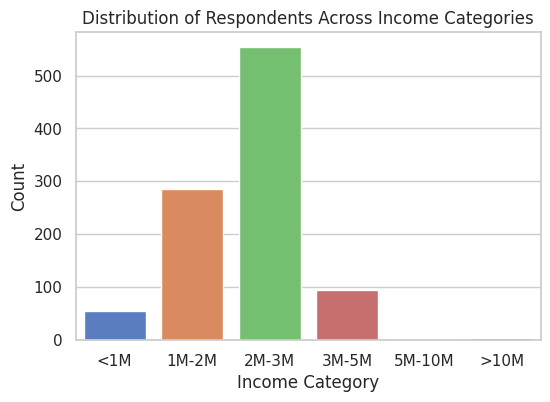

In [205]:
# Bar Chart for Income Category Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Income Category', palette='muted')
plt.title('Distribution of Respondents Across Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

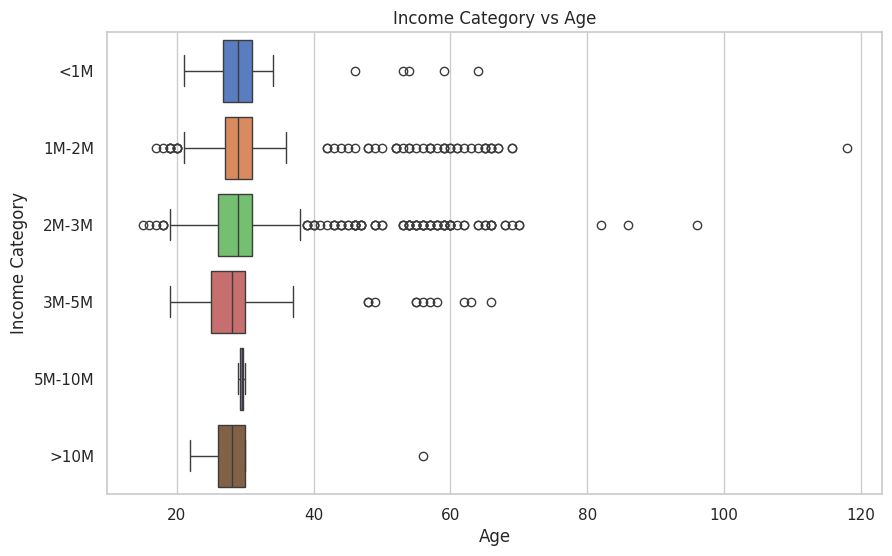

In [206]:
# Box Plot for Comparing Income Categories with Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Income Category', x='Age', palette='muted')
plt.title('Income Category vs Age')
plt.ylabel('Income Category')
plt.xlabel('Age')
plt.show()



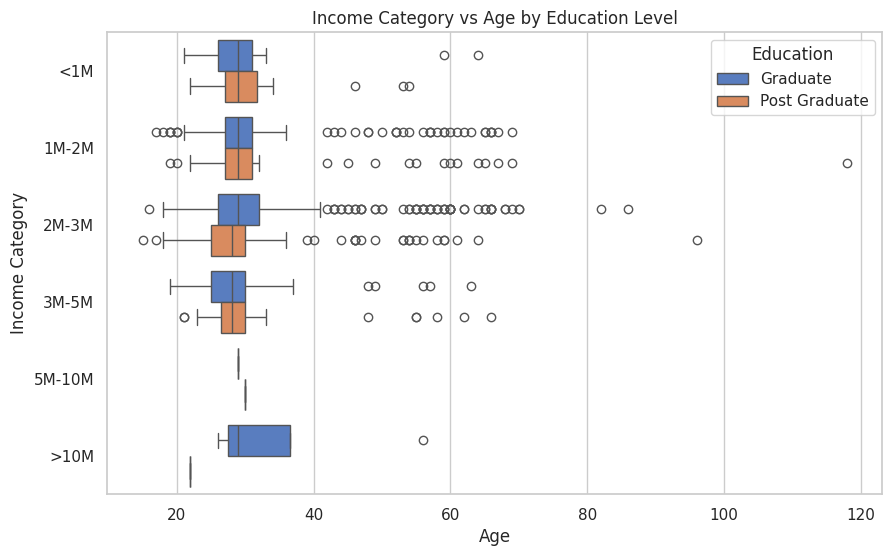

In [207]:
# Box Plot for Comparing Income Categories with Education
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Income Category', x='Age', hue='Education', palette='muted')
plt.title('Income Category vs Age by Education Level')
plt.ylabel('Income Category')
plt.xlabel('Age')
plt.legend(title='Education')
plt.show()



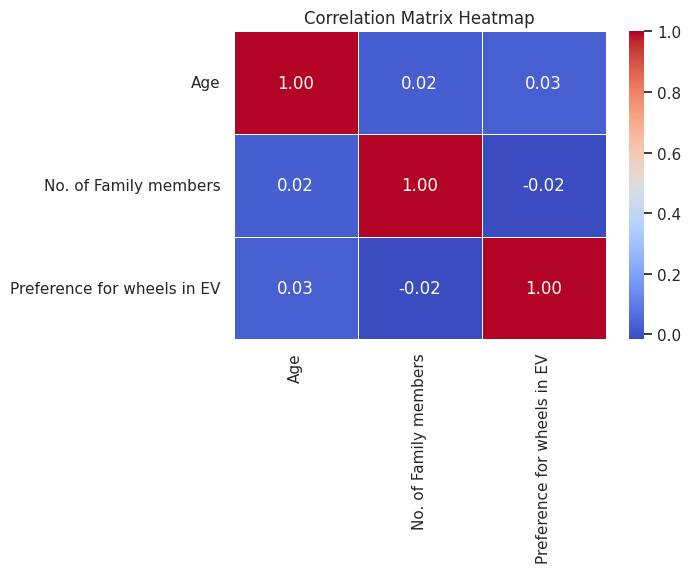

In [208]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

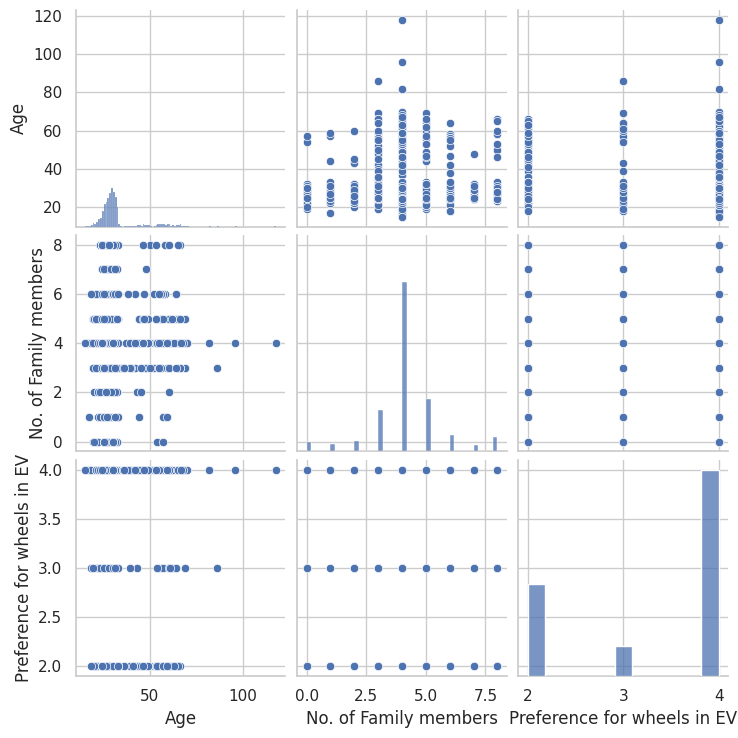

In [209]:
sns.pairplot(df)

In [210]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [211]:
df.columns

Index(['Age', 'City', 'Marital Status', 'Education', 'No. of Family members',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?',
       'Income Category'],
      dtype='object')

In [212]:
df['City']= label_encode(df,'City')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of  EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of  EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [213]:
df.head()

,Age,City,Marital Status,Education,No. of Family members,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Income Category
0,30,14,1,0,5,0,3,2,4,2,2,0,1M-2M
1,27,21,1,0,4,2,3,2,3,0,4,2,1M-2M
2,32,12,1,0,4,2,1,2,5,0,4,2,2M-3M
3,55,21,1,0,3,0,1,1,4,2,4,1,2M-3M
4,26,23,1,0,4,2,4,2,10,0,4,2,2M-3M


In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = df['City']
X = df.drop(['City'],axis=1,inplace = True)

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.iloc[:,:-1]

calc_vif(X)



,variables,VIF
0,Age,7.675934
1,Marital Status,2.694430
2,Education,1.439885
3,No. of Family members,7.845197
4,Would you prefer replacing all your vehicles t...,4.012059
5,If Yes/Maybe what type of EV would you prefer?,6.736339
6,Do you think Electronic Vehicles are economical?,6.090592
7,Which brand of vehicle do you currently own?,3.805721
8,How much money could you spend on an Electroni...,1.776278
9,Preference for wheels in EV,11.679092


In [215]:
df=df_1

df.head()

,Age,City,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [216]:
# Define a dictionary to map number values to categories
income_categories = {
    '700000': '<5 lakhs',
    '1200000': '<15 lakhs',
    '1500000': '<15 lakhs',
    '2000000': '<25 lakhs'
}

# Replace number values with categories in the 'How much money could you spend on an Electronic vehicle?' column
df['How much money could you spend on an Electronic vehicle?'] = df['How much money could you spend on an Electronic vehicle?'].replace(income_categories)

# Display the unique values in the column to verify the replacements
print(df['How much money could you spend on an Electronic vehicle?'].unique())
# Define the bins and labels
bins = [0, 1000000, 2000000, 3000000, 5000000, 10000000, float('inf')]
labels = ['<1M', '1M-2M', '2M-3M', '3M-5M', '5M-10M', '>10M']

# Use cut to bin the values
df['Income Category'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)
df['Income Category'].value_counts()
# df.head()

['<5 lakhs' '<15 lakhs' '<25 lakhs' '>25 lakhs']


Income Category
2M-3M     554
1M-2M     286
3M-5M      94
<1M        56
>10M        5
5M-10M      2
Name: count, dtype: int64

In [217]:
df.drop('Annual Income', axis=1, inplace = True)


In [218]:
df.head()

,Age,City,Marital Status,Education,No. of Family members,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Income Category
0,30,Nabha,Single,Graduate,5,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1M-2M
1,27,Pune,Single,Graduate,4,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",1M-2M
2,32,Kashipur,Single,Graduate,4,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",2M-3M
3,55,Pune,Single,Graduate,3,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",2M-3M
4,26,Satara,Single,Graduate,4,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",2M-3M


In [219]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}\n")

Column: Age
Unique Values: [ 30  27  32  55  26  28  23  25  43  59  21  29  56  70  50  24  61  39
  31  40  18  58  22  96  64  52  54  42  49  57  46  36  20  19  65  17
  60  44  45  47  82  33  37  48  69  67  86  62  66  34  63  41  68  16
  53  15 118  38]

Column: City
Unique Values: ['Nabha' 'Pune' 'Kashipur ' 'Satara' 'Noida' 'Delhi' 'Mumbai' 'pune'
 'solapur' 'Haldwani ' 'Nellore ' 'Pune ' 'Haldwani' 'Banglore '
 'Faridabad ' 'Nagpur' 'Chandrapur ' 'Chennai' 'Gurugram ' 'Nashik'
 'Bengaluru' 'Mumbai ' 'Hakdwani' 'Patiyala' 'pUNE' 'Ahmedabad' 'Karnal'
 'Rewari' 'New Delhi' 'Serampore' 'Jhansi' 'New Delhi ' 'Jalandhar'
 'Delhi ' 'nashik']

Column: Marital Status
Unique Values: ['Single' 'Married']

Column: Education
Unique Values: ['Graduate' 'Post Graduate']

Column: No. of Family members
Unique Values: [5 4 3 2 8 6 0 1 7]

Column: Would you prefer replacing all your vehicles to Electronic vehicles?
Unique Values: ['Maybe' 'Yes' 'No']

Column: If Yes/Maybe what type of  EV wo

In [220]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Selecting features for clustering
features = ['Age', 'City', 'Marital Status', 'Education', 'No. of Family members',
            'Would you prefer replacing all your vehicles to Electronic vehicles?',
            'Do you think Electronic Vehicles are economical?',
            'Which brand of vehicle do you currently own?',
            'How much money could you spend on an Electronic vehicle?',
            'Preference for wheels in EV',
            'Do you think Electronic vehicles will replace fuel cars in India?',
            'Income Category']

# Separating the features we want to consider for clustering
X = df[features]

# Defining preprocessing for numerical and categorical features
numeric_features = ['No. of Family members']
numeric_transformer = StandardScaler()

categorical_features = ['City', 'Marital Status', 'Education',
                        'Would you prefer replacing all your vehicles to Electronic vehicles?',
                        'Do you think Electronic Vehicles are economical?',
                        'Which brand of vehicle do you currently own?',
                        'How much money could you spend on an Electronic vehicle?',
                        'Do you think Electronic vehicles will replace fuel cars in India?',
                        'Income Category']
categorical_transformer = OneHotEncoder()

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
df['Cluster'] = cluster_labels

print(df.head())


   Age       City Marital Status Education  No. of Family members  \
0   30      Nabha         Single  Graduate                      5   
1   27       Pune         Single  Graduate                      4   
2   32  Kashipur          Single  Graduate                      4   
3   55       Pune         Single  Graduate                      3   
4   26     Satara         Single  Graduate                      4   

  Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                              Maybe                     
1                                                Yes                     
2                                                Yes                     
3                                              Maybe                     
4                                                Yes                     

  If Yes/Maybe what type of  EV would you prefer?  \
0                                             SUV   
1                                 

In [221]:
# computing the mean values of numerical features for each cluster
cluster_means = df.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         No. of Family members  City Marital Status      Education  \
Cluster                                                              
0                     4.059155  Pune         Single       Graduate   
1                     7.000000  Pune         Single       Graduate   
2                     4.071713  Pune         Single  Post Graduate   
3                     1.058824  Pune         Single       Graduate   
4                     4.010000  Pune        Married       Graduate   

        Would you prefer replacing all your vehicles to Electronic vehicles?  \
Cluster                                                                        
0                                                      Yes                     
1                                                      Yes                     
2                                                      Yes                     
3                                                      Yes                     
4                            

Based on the mean values of numerical features and the most frequent categories for categorical features within each cluster, we can assign names to each cluster that reflect their defining characteristics. Here's a suggestion:

- Cluster 0: **Young Urban Professionals**
  - Characteristics:
    - Moderate family size (average of around 4 members)
    - Mostly located in Pune
    - Mostly single and graduates
    - Likely to prefer replacing all vehicles with electronic vehicles
    - Believe electronic vehicles are economical
    - Own Hyundai vehicles
    - Willing to spend less than 15 lakhs on an electronic vehicle
    - Believe electronic vehicles will replace fuel cars in less than 10 years
    - Belong to the 2M-3M income category

- Cluster 1: **Affluent Urban Singles**
  - Characteristics:
    - Large family size (average of 7 members)
    - Mostly located in Pune
    - Mostly single and graduates
    - Likely to prefer replacing all vehicles with electronic vehicles
    - Believe electronic vehicles are economical
    - Own Hyundai vehicles
    - Willing to spend less than 15 lakhs on an electronic vehicle
    - Believe electronic vehicles will replace fuel cars in less than 10 years
    - Belong to the 2M-3M income category

- Cluster 2: **Tech-Savvy Post Graduates**
  - Characteristics:
    - Moderate family size (average of around 4 members)
    - Mostly located in Pune
    - Mostly single and post-graduates
    - Likely to prefer replacing all vehicles with electronic vehicles
    - Believe electronic vehicles are economical
    - Own Tata vehicles
    - Willing to spend less than 15 lakhs on an electronic vehicle
    - Believe electronic vehicles will replace fuel cars in less than 20 years
    - Belong to the 2M-3M income category

- Cluster 3: **Young Urban Singles with Limited Budget**
  - Characteristics:
    - Small family size (average of around 1 member)
    - Mostly located in Pune
    - Mostly single and graduates
    - Likely to prefer replacing all vehicles with electronic vehicles
    - Believe electronic vehicles are economical
    - Own Tata vehicles
    - Willing to spend less than 15 lakhs on an electronic vehicle
    - Believe electronic vehicles will replace fuel cars in less than 10 years
    - Belong to the 2M-3M income category

- Cluster 4: **Mixed Urban Families**
  - Characteristics:
    - Moderate family size (average of around 4 members)
    - Mostly located in Pune
    - Mostly married and graduates
    - Likely to prefer replacing all vehicles with electronic vehicles
    - Believe electronic vehicles are economical
    - Own Tata vehicles
    - Willing to spend less than 15 lakhs on an electronic vehicle
    - Believe electronic vehicles will replace fuel cars in less than 20 years
    - Belong to the 2M-3M income category

These names reflect the key characteristics of each cluster and can be used to better understand and target each group in marketing campaigns or other strategies.
